In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Improving Computer Vision Accuracy using Convolutions

## SIMPLE DNN

In [17]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.4960 - accuracy: 0.8247
Epoch 2/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3737 - accuracy: 0.8651
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3350 - accuracy: 0.8772
Epoch 4/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3109 - accuracy: 0.8856
Epoch 5/5
10000/10000 [==============================] - 0s 45us/sample - loss: 0.3331 - accuracy: 0.8821


## CNN

Your accuracy is probably about 89% on training and 87% on validation...not bad...But how do you make that even better? One way is to use something called Convolutions. I'm not going to details on Convolutions here, but the ultimate concept is that they narrow down the content of the image to focus on specific, distinct, details. 

If you've ever done image processing using a filter (like this: https://en.wikipedia.org/wiki/Kernel_(image_processing)) then convolutions will look very familiar.

In short, you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

That's the concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate.

Run the below code -- this is the same neural network as earlier, but this time with Convolutional layers added first. It will take longer, but look at the impact on the accuracy:

In [18]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
              tf.keras.layers.MaxPooling2D(2, 2),
              tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
              tf.keras.layers.MaxPooling2D(2,2),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(128, activation=tf.nn.relu),
              tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.summary()

test_loss = model.evaluate(test_images, test_labels)
test_loss

Epoch 1/5
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.4417 - accuracy: 0.8369
Epoch 2/5
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.2954 - accuracy: 0.8906
Epoch 3/5
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.2463 - accuracy: 0.9090
Epoch 4/5
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.2179 - accuracy: 0.9182
Epoch 5/5
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.1912 - accuracy: 0.9282
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)     

[0.2610365111768246, 0.9101]

### Steps to follow

Step 1 : is to gather the data. You'll notice that there's a bit of a change here in that the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape.

Step 2 : Next is to define your model. Now instead of the input layer at the top, you're going to add a Convolution. The parameters are:

The number of convolutions you want to generate. Purely arbitrary, but good to start with something in the order of 32
The size of the Convolution, in this case a 3x3 grid
The activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0
In the first layer, the shape of the input data

Step 3 : Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version

Step 4 : The same 128 dense layers, and 10 output layers as in the pre-convolution example:

Step 5 : Now compile the model, call the fit method to do the training, and evaluate the loss and accuracy from the test set.

# Visualizing the Convolutions and Pooling

This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [20]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [28]:
FIRST_IMAGE = 0
SECOND_IMAGE = 99
THIRD_IMAGE = 27
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<tf.Tensor 'conv2d_6/Relu:0' shape=(None, 26, 26, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_6/MaxPool:0' shape=(None, 13, 13, 64) dtype=float32>,
 <tf.Tensor 'conv2d_7/Relu:0' shape=(None, 11, 11, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_7/MaxPool:0' shape=(None, 5, 5, 64) dtype=float32>,
 <tf.Tensor 'flatten_11/Reshape:0' shape=(None, 1600) dtype=float32>,
 <tf.Tensor 'dense_14/Relu:0' shape=(None, 128) dtype=float32>,
 <tf.Tensor 'dense_15/Softmax:0' shape=(None, 10) dtype=float32>]

In [29]:
model.input

<tf.Tensor 'conv2d_6_input:0' shape=(None, 28, 28, 1) dtype=float32>

In [30]:
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
activation_model

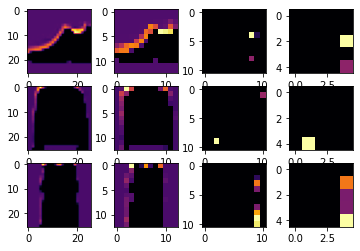

In [31]:
f, axarr = plt.subplots(3,4)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

# EXERCISES

## change convolution filter from 64 to 32

In [33]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
              tf.keras.layers.MaxPooling2D(2, 2),
              tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
              tf.keras.layers.MaxPooling2D(2,2),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(128, activation=tf.nn.relu),
              tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.summary()

test_loss = model.evaluate(test_images, test_labels)
test_loss

Epoch 1/5
60000/60000 [==============================] - 32s 536us/sample - loss: 0.4756 - accuracy: 0.8274
Epoch 2/5
60000/60000 [==============================] - 36s 601us/sample - loss: 0.3168 - accuracy: 0.8845
Epoch 3/5
60000/60000 [==============================] - 36s 600us/sample - loss: 0.2716 - accuracy: 0.9006
Epoch 4/5
60000/60000 [==============================] - 37s 624us/sample - loss: 0.2427 - accuracy: 0.9111
Epoch 5/5
60000/60000 [==============================] - 36s 599us/sample - loss: 0.2190 - accuracy: 0.9183
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11

[0.251630320417881, 0.9086]

## Remove Second Layer of Conv

In [34]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
              tf.keras.layers.MaxPooling2D(2, 2),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(128, activation=tf.nn.relu),
              tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.summary()

test_loss = model.evaluate(test_images, test_labels)
test_loss

Epoch 1/5
60000/60000 [==============================] - 54s 899us/sample - loss: 0.3769 - accuracy: 0.8655
Epoch 2/5
60000/60000 [==============================] - 51s 853us/sample - loss: 0.2571 - accuracy: 0.9071
Epoch 3/5
60000/60000 [==============================] - 52s 867us/sample - loss: 0.2129 - accuracy: 0.9210
Epoch 4/5
60000/60000 [==============================] - 51s 842us/sample - loss: 0.1794 - accuracy: 0.9339
Epoch 5/5
60000/60000 [==============================] - 51s 843us/sample - loss: 0.1497 - accuracy: 0.9455
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 10816)

[0.25051212109625337, 0.9168]

## Adding more convolution

In [35]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
              tf.keras.layers.MaxPooling2D(2, 2),
              tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
              tf.keras.layers.MaxPooling2D(2,2),
              tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
              tf.keras.layers.MaxPooling2D(2,2),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(128, activation=tf.nn.relu),
              tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.summary()

test_loss = model.evaluate(test_images, test_labels)
test_loss

Epoch 1/5
60000/60000 [==============================] - 43s 708us/sample - loss: 0.6344 - accuracy: 0.7667
Epoch 2/5
60000/60000 [==============================] - 41s 680us/sample - loss: 0.4321 - accuracy: 0.8416
Epoch 3/5
60000/60000 [==============================] - 41s 677us/sample - loss: 0.3821 - accuracy: 0.8599
Epoch 4/5
60000/60000 [==============================] - 36s 603us/sample - loss: 0.3466 - accuracy: 0.8716
Epoch 5/5
60000/60000 [==============================] - 36s 594us/sample - loss: 0.3248 - accuracy: 0.8783
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 1

[0.3684345170021057, 0.865]

# Results:

Simple DNN  : <br>
Epoch 5/5<br>
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2921 - accuracy: 0.8932<br>
10000/10000 [==============================] - 0s 45us/sample - loss: 0.3331 - accuracy: 0.8821<br>

Convolution with 2 layer of 64:<br>
Epoch 5/5<br>
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.1912 - accuracy: 0.9282<br>
10000/10000 [==============================] - 2s 246us/sample - loss: 0.2610 - accuracy: 0.9101<br>

Change convolution filter from 64 to 32: <br>
Epoch 5/5<br>
60000/60000 [==============================] - 36s 599us/sample - loss: 0.2190 - accuracy: 0.9183<br>
10000/10000 [==============================] - 2s 203us/sample - loss: 0.2516 - accuracy: 0.9086<br>

Removing 2nd layer of convolution : <br>
Epoch 5/5<br>
60000/60000 [==============================] - 51s 843us/sample - loss: 0.1497 - accuracy: 0.9455<br>
10000/10000 [==============================] - 2s 228us/sample - loss: 0.2505 - accuracy: 0.9168<br>

Adding 3rd layer of convolution : <br>
Epoch 5/5<br>
60000/60000 [==============================] - 36s 594us/sample - loss: 0.3248 - accuracy: 0.8783<br>
10000/10000 [==============================] - 1s 135us/sample - loss: 0.3684 - accuracy: 0.8650<br>